# Perform Linear regression , Ridge regression , lasso and elastic regression on Alferian forest Data 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os 

Attribute Information :-

**Period Covered**

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)


**Weather data observations**

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8


**FWI Components**

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€


In [138]:
# reading the data set 

df=pd.read_csv("C:/Users/nizam/Downloads/EDA/Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# EDA

In [139]:
df.shape

(246, 14)

 Data has 14 feature and 246 Rows 

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


All features data type is object/ string 

In [141]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [142]:
df[df.isna().any(axis=1)] # to find the nan row in our data 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [143]:
#Drop NaN  value row 
df.drop([167],inplace=True)
df.drop([122],inplace=True)

In [144]:
df.iloc[123:123]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [145]:
df[df.isna().any(axis=1)] # No NaN Value in the Table 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [146]:
df.isnull().sum() # all nan values has been  removed 

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [147]:
df.describe().T


,count,unique,top,freq
day,244,32,01,8
month,244,5,08,62
year,244,2,2012,243
Temperature,244,20,35,29
RH,244,63,64,10
Ws,244,19,14,43
Rain,244,40,0,133
FFMC,244,174,88.9,7
DMC,244,166,7.9,5
DC,244,198,8,5


In [148]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1
# splitting the data  and creating the  new column 

In [149]:
df.loc[123:123] # to check the unecassray data 


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [150]:
df.drop([123],inplace=True) # drop unecassry data 

In [151]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


# Checking the Column Headers

In [152]:
df.columns


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [153]:
#Removing unnecessary space in column headers using str.strip()
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [154]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

# Converting the necessary column dataye to int

In [155]:
#1st Method 
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]= df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype('int64')

In [156]:
#Second method 
df = df.astype({'RH':np.int64, 'Temperature':np.int64, 'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64
               ,'DMC':np.float64, 'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,
               'FWI':np.float64})

In [46]:
#Third method 
df=df.astype({'day':'int', 'month':'int', 'year':'int', 'Temperature':'int', 'RH':'int', 'Ws':'int', 'Rain':'float', 'FFMC':'float','DMC':'float', 'DC':'float','ISI':'float'})

In [157]:
# Printing all the categorical columns
categorical_col = [fea for fea in df.columns if df[fea].dtype == 'O']
categorical_col

['Classes']

In [158]:
# Printing all the numerical columns
numerical_col = [fea for fea in df.columns if df[fea].dtype != 'O']
numerical_col

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

In [159]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

Values in df[Classes] has unnecessary spaces that are removed by str.strip()

In [160]:
df.Classes=df.Classes.str.strip()

In [161]:
df.Classes.unique()

array(['not fire', 'fire'], dtype=object)

In [162]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [163]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

Dropping the year column as the data is for the same year

In [164]:
df1=df.drop(['year'],axis=1)


In [165]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0


**Encoding not fire as 0 and Fire as 1**

In [166]:
df1.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [167]:
df1['Classes']=np.where(df1['Classes']=='not fire',0,1)


In [169]:
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

Another way of one hot encoding 
#encoding the data values using one hot encoding techiniue
df1 = pd.get_dummies(df,columns=['Classes'],drop_first=True)

**Relation between the feature**

<AxesSubplot:>

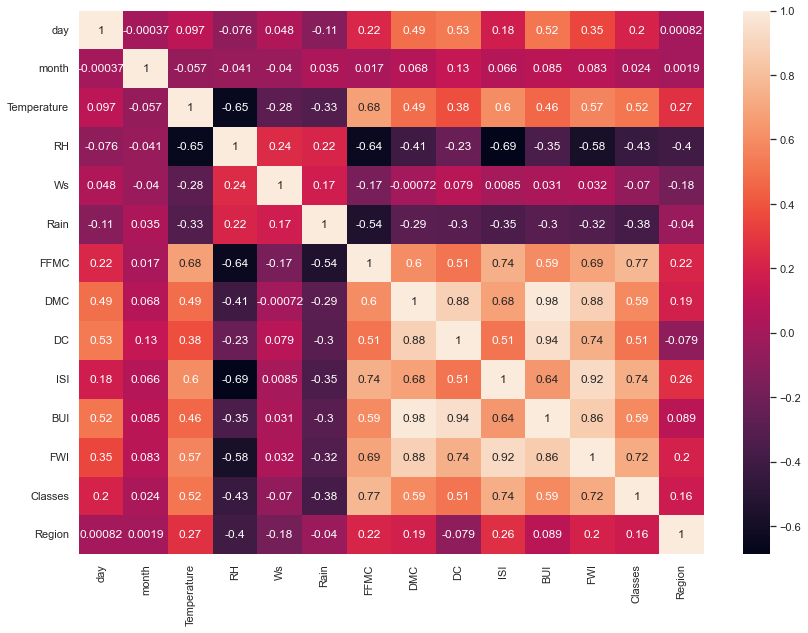

In [190]:
#Heatmap
sns.set(rc = {'figure.figsize' : (14,10)})
sns.heatmap(df1.corr(), annot = True)

Report

RH is negatively corelated with Temperature, FFMC and ISI

Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

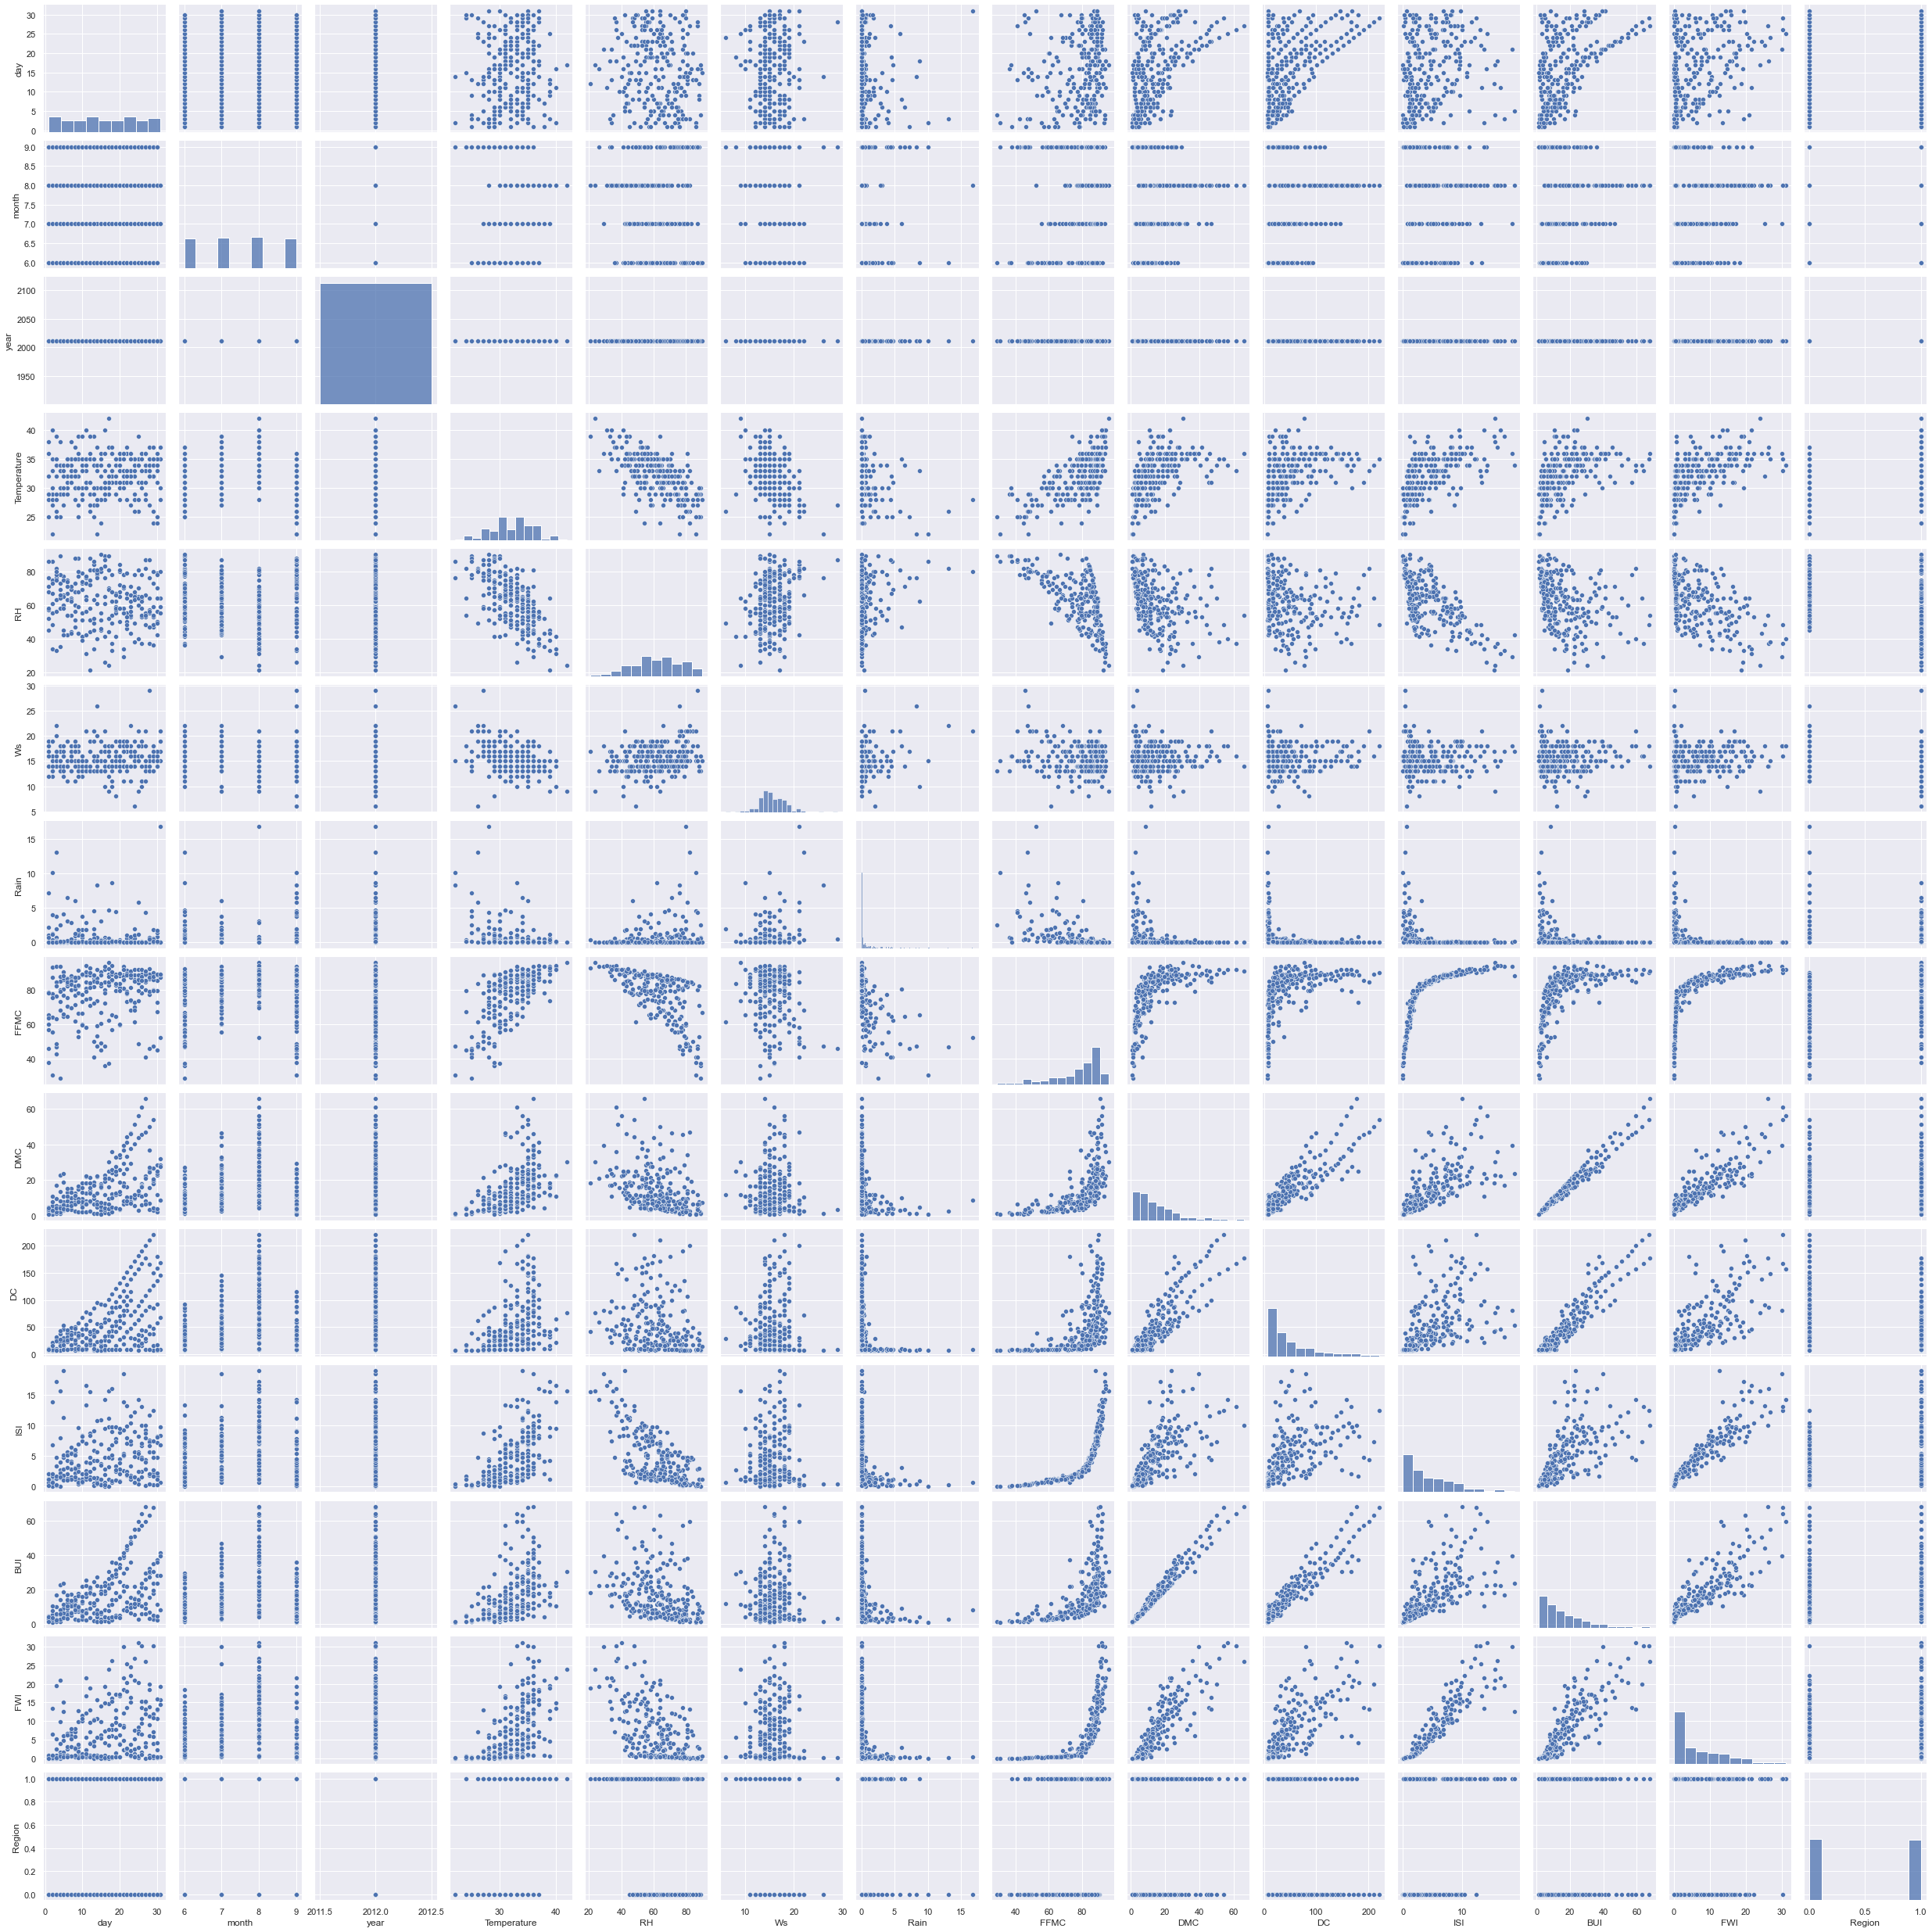

In [57]:
sns.pairplot(df)


**Scatter Plots:**
    
Scatterplot provides you with a visual idea of the pattern that your variables follow.

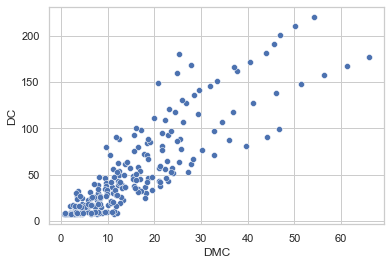

In [171]:
#Plotting correlation between DMC & DC features
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.scatterplot(x=df1['DMC'],y=df1['DC'],data=df1)
df['DMC'].corr(df['DC'])
#print("Correlation value is",df['DMC'].df['DC'])
plt.show()

DMC and DC related to each other 

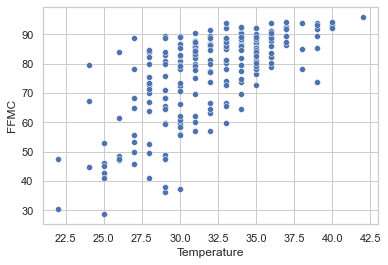

In [172]:
#Plotting correlation between Temperature & FFMC features
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.scatterplot(x=df1['Temperature'],y=df1['FFMC'],data=df1)
df1['Temperature'].corr(df1['FFMC'])
#print("Correlation value is",df['Temperature'].df['FFMC'])
plt.show()

Text(0, 0.5, 'Temperature')

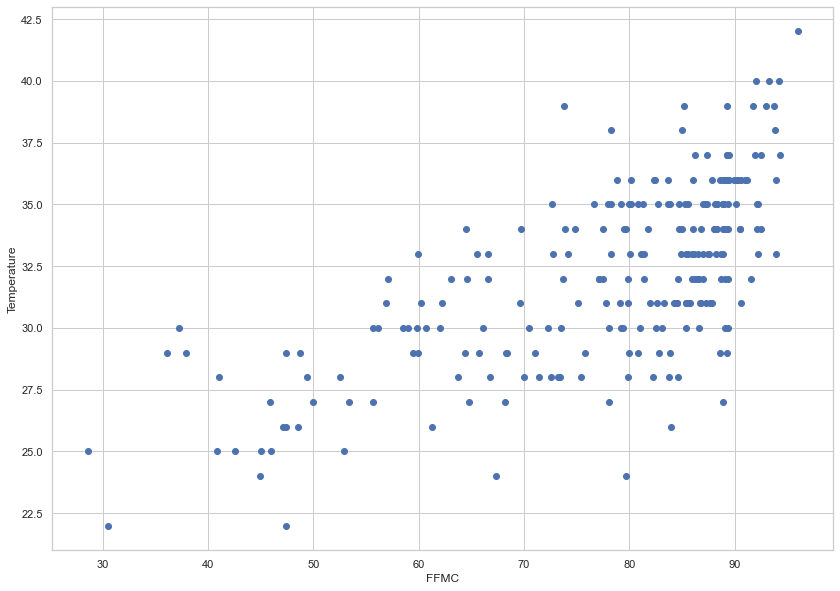

In [173]:
plt.scatter(df1['FFMC'],df1['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

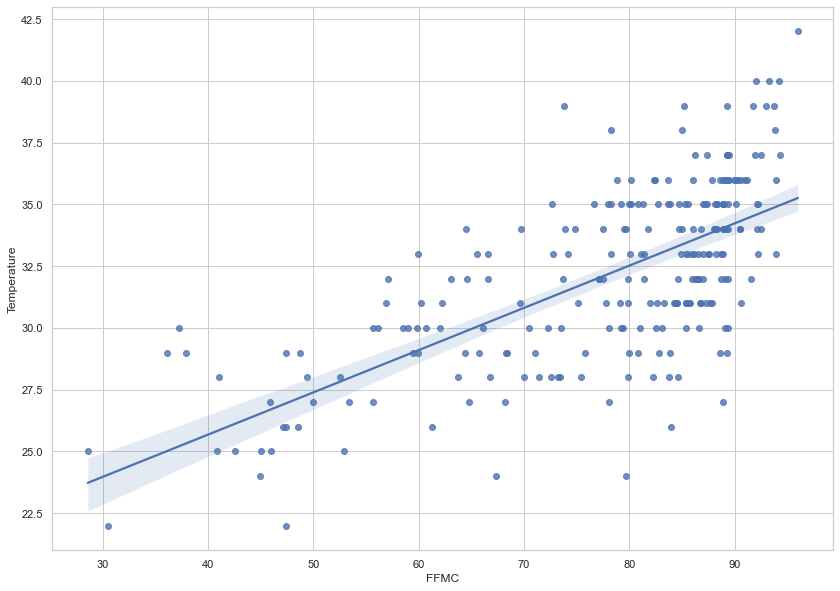

In [174]:
sns.regplot(x='FFMC',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

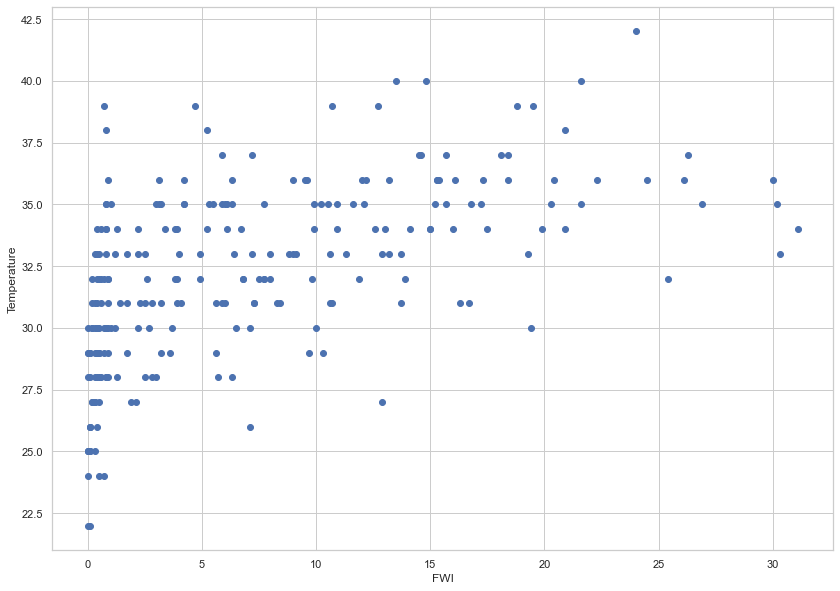

In [175]:
plt.scatter(df1['FWI'],df['Temperature'])
plt.xlabel("FWI")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

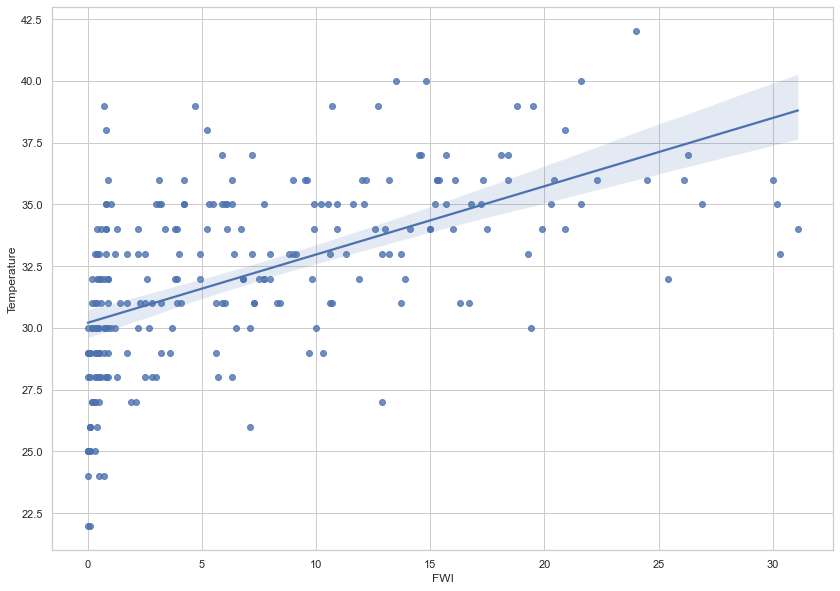

In [176]:
sns.regplot(x='FWI',y='Temperature',data=df1)


Text(0, 0.5, 'Temperature')

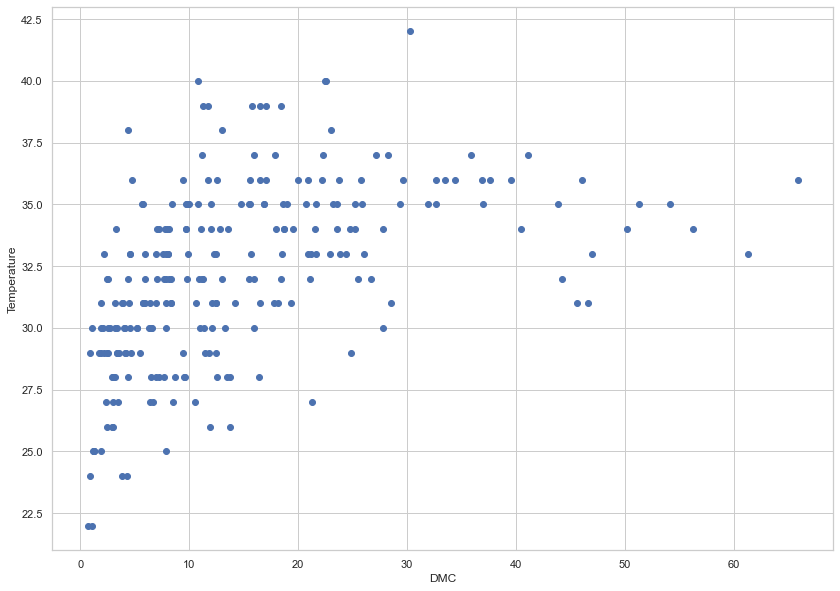

In [177]:
plt.scatter(df1['DMC'],df1['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

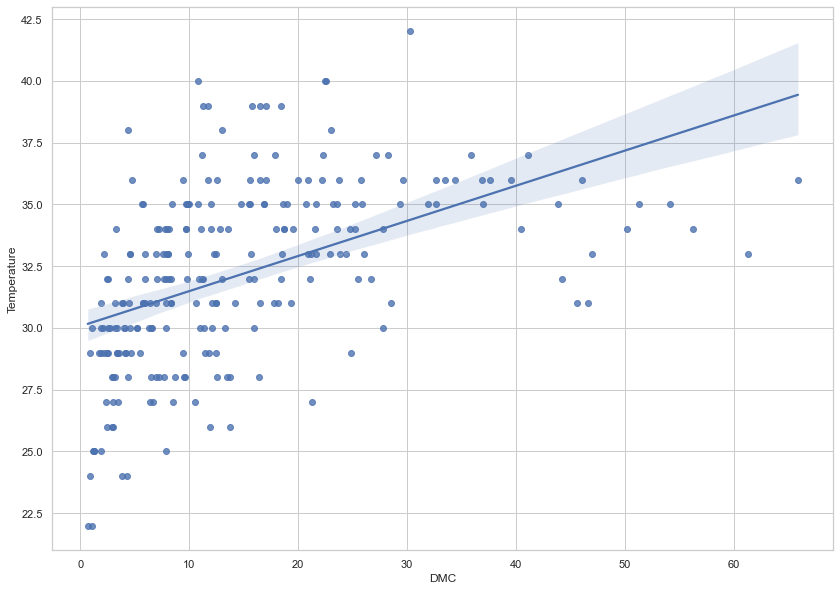

In [178]:
sns.regplot(x='DMC',y='Temperature',data=df1)


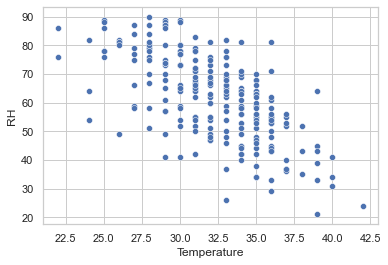

In [187]:
#Plotting correlation between Temperature & RH features
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.scatterplot(x=df1['Temperature'],y=df1['RH'],data=df1)
df1['Temperature'].corr(df1['RH'])
#print("Correlation value is",df['Temperature'].df['RH'])
plt.show()

**Box Plot:**


A box-plot is a very useful and standardized way of displaying the distribution of data based on a five-number summary (minimum, first quartile, second quartile(median), third quartile, maximum). It helps in understanding these parameters of the distribution of data and is extremely helpful in detecting outliers.

C:\Users\nizam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

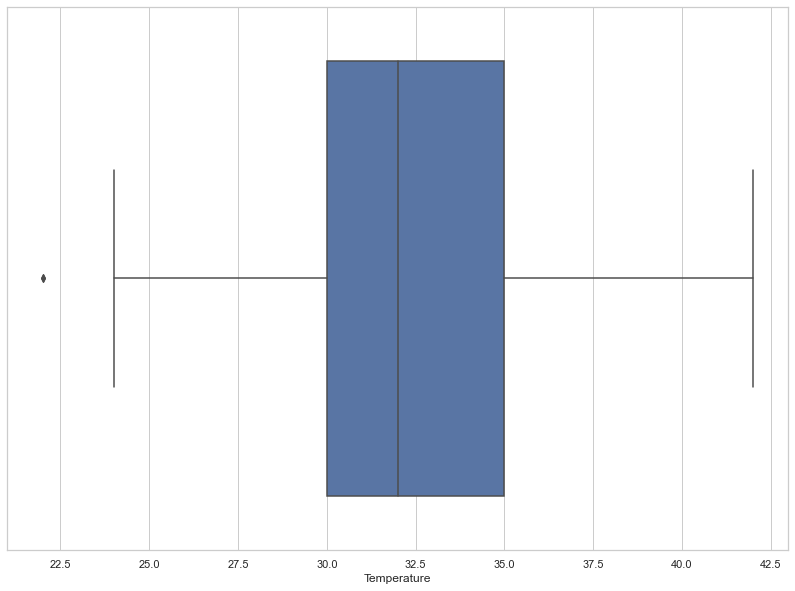

In [179]:
#Box Plot
sns.boxplot(df1['Temperature'])

**Forest Fire Weather Index System[FWI] Boxplot**

C:\Users\nizam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

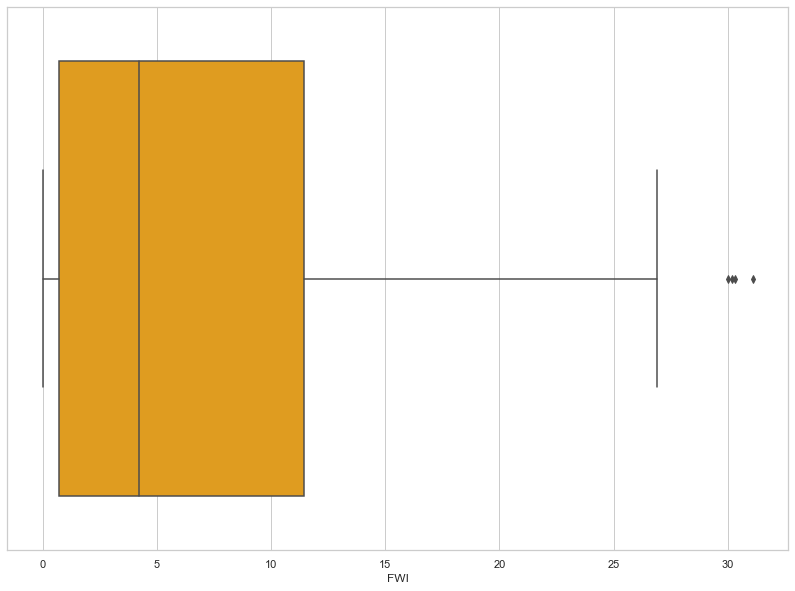

In [188]:
sns.boxplot(df1['FWI'],color='orange')

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

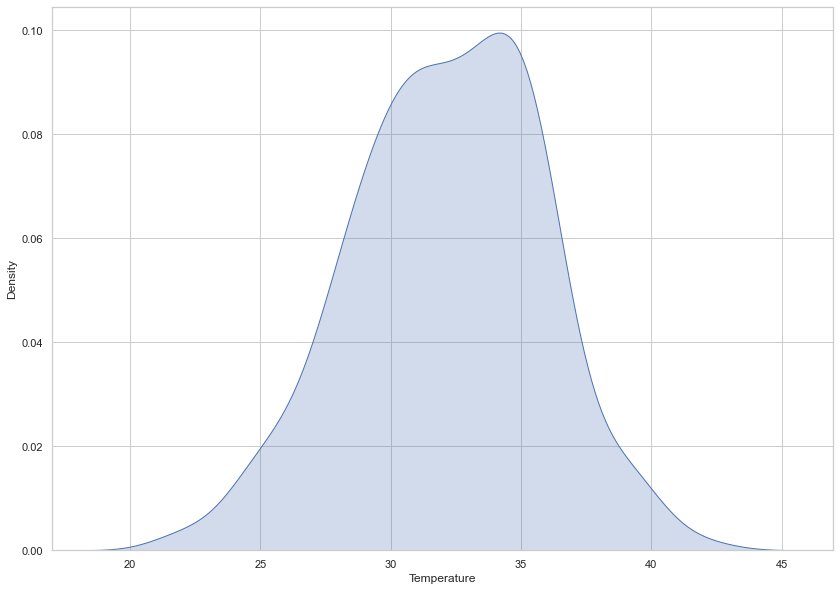

In [180]:
#Density plot/kde plot(in seaborn)
sns.kdeplot(df1['Temperature'],shade=True)

**Histogram**

-A histogram is basically used to represent data provided in a form of sme groups. Histograms are similar to bar charts which display the counts or relative frequencies of values falling in different class intervals or ranges. A histogram displays the shape and spread of continuous sample data. It also helps us understand the skewness and kurtosis of the distribution of the data.

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'Classes'}>,
        <AxesSubplot:title={'center':'Region'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

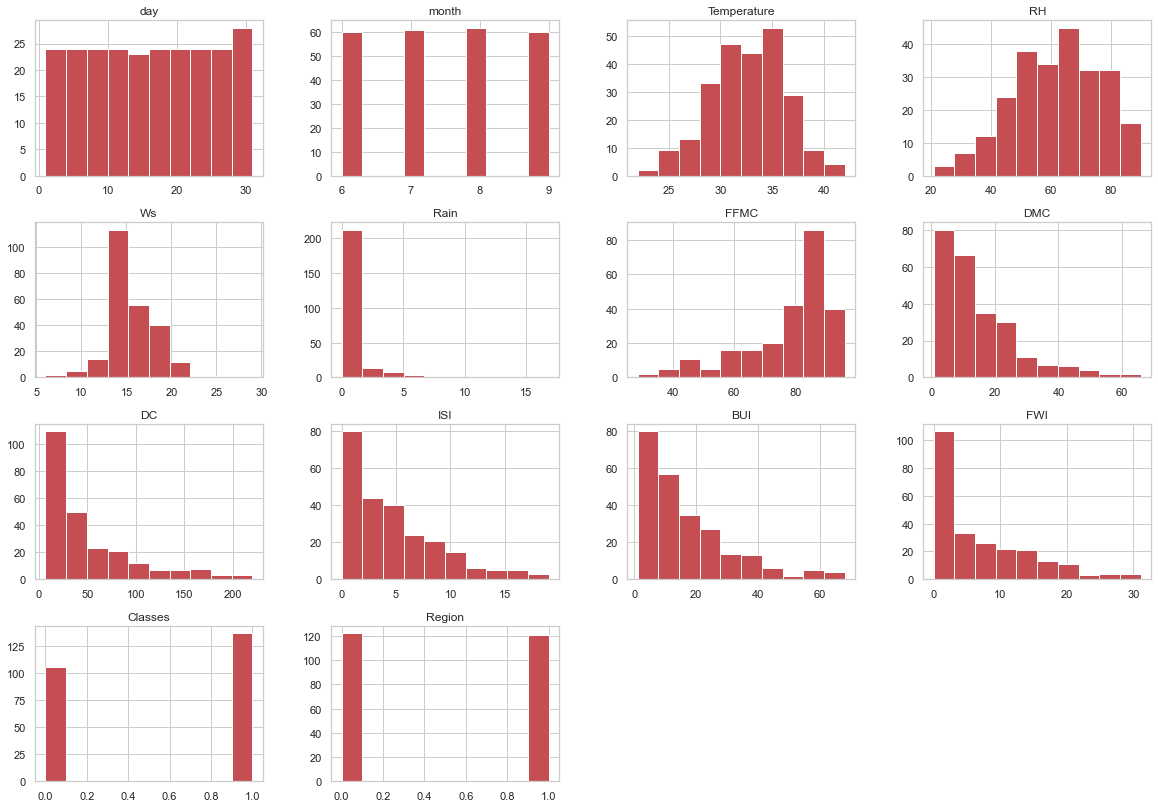

In [182]:
df1.hist(figsize=(20,14),color='r')


**Percentage for Pie Chart**

In [183]:
percentage=df1.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

**Plotting Pie chart**



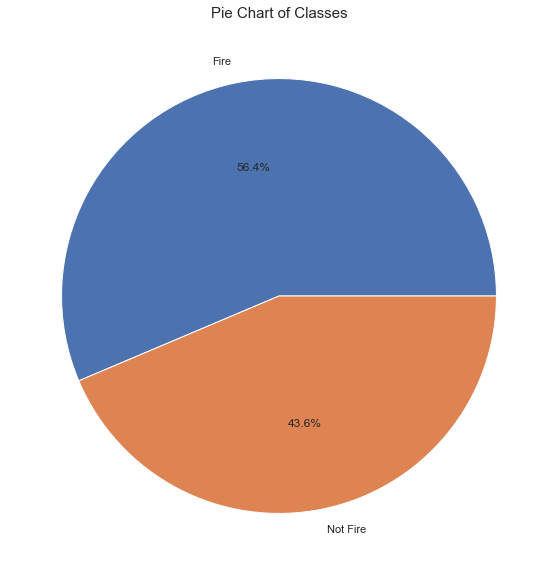

In [184]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

**Train Test Splitting**

In [191]:
x=df1.drop('Temperature',axis=1)



In [192]:
y=df1['Temperature']


In [193]:
x.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [194]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int64

In [195]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)


In [196]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

162
162
81
81


In [197]:
# standarding the featues using Standard Scaler feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 1.30705791, -1.39305207,  0.06835876, ...,  0.52024214,
         0.90566259, -1.01242284],
       [ 1.77217242,  1.29354835,  0.99672801, ..., -0.93452011,
        -1.10416397, -1.01242284],
       [ 0.95822202, -0.4975186 ,  0.53254338, ...,  1.30997022,
         0.90566259,  0.9877296 ],
       ...,
       [ 0.14427163,  1.29354835, -2.45150064, ...,  1.72561657,
         0.90566259,  0.9877296 ],
       [-1.2510719 , -1.39305207,  0.06835876, ..., -0.8098262 ,
        -1.10416397,  0.9877296 ],
       [-0.55340014, -1.39305207,  1.0630401 , ..., -0.82368108,
        -1.10416397, -1.01242284]])

In [198]:
X_test

array([[ 0.26055026, -0.4975186 ,  0.46623129, ..., -0.44959936,
         0.90566259, -1.01242284],
       [-0.20456425,  1.29354835, -0.92632258, ...,  0.4786775 ,
         0.90566259,  0.9877296 ],
       [ 1.77217242, -0.4975186 , -0.46213796, ...,  0.88046898,
         0.90566259,  0.9877296 ],
       ...,
       [ 1.30705791,  0.39801488, -1.72206765, ...,  3.24965322,
         0.90566259,  0.9877296 ],
       [-0.43712151,  1.29354835,  0.93041592, ..., -0.90681035,
        -1.10416397, -1.01242284],
       [ 0.37682889,  0.39801488, -0.59476213, ...,  1.28226046,
         0.90566259, -1.01242284]])

**Model Training**

**Linear Regression**               

In [201]:

from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [202]:
regression.fit(X_train, y_train)#we are applying formula not changing data


LinearRegression()

In [203]:
#print the coefficients and the intercept
print(regression.coef_)
print(regression.intercept_)

[-0.36077135 -0.2311454  -1.50045027 -0.70384333 -0.24625832  0.84766384
  0.09164637  0.68596622  0.10380813  0.16594124 -0.38469383  0.18553708
  0.22661524]
32.074074074074076


**coefficients**:  coefficient indicates the direction of the relationship between a predictor variable and the response variable. A positive sign indicates that as the predictor variable(y )increases, the response variable(X) also increases. basicaly these are feature which plays the important role for the outcome.

**Intercept** :  intercept is the value of our target variable when all our features are zero and our function crosses the y-axis. 

In [204]:
#prediction 
reg_pred = regression.predict(X_test)
reg_pred

array([31.99493488, 33.12664016, 33.32629208, 24.7838569 , 29.2460991 ,
       33.66799244, 31.64931814, 34.58818421, 31.79084174, 32.31038339,
       33.54818002, 33.34754307, 35.78255767, 32.03424221, 34.27923643,
       33.26037242, 26.52877687, 35.94057602, 33.33186761, 23.57110435,
       32.36221708, 32.52712236, 33.06301323, 32.81955926, 29.903744  ,
       32.73791527, 32.89973308, 32.14375238, 31.97567765, 34.09071758,
       34.61315534, 33.87565689, 34.55720694, 32.78051614, 31.25884225,
       28.73433642, 32.57424997, 31.67173881, 33.05658571, 34.00592683,
       33.83451992, 35.61866932, 34.26998499, 37.40865649, 32.90557183,
       36.49959526, 32.27373405, 35.35128002, 30.60009684, 31.10436839,
       32.39267139, 39.0865001 , 32.75773646, 34.64063089, 27.20344681,
       36.86613123, 33.83117207, 33.74796958, 28.98445209, 32.4738513 ,
       32.52599845, 31.99902312, 24.8016617 , 36.29777696, 36.03327802,
       28.94688288, 29.45302718, 29.37313652, 35.96924316, 28.45

**ASSUMPTIONS OF LINEAR REGRESSION**

Text(0, 0.5, 'Test Predicted Data')

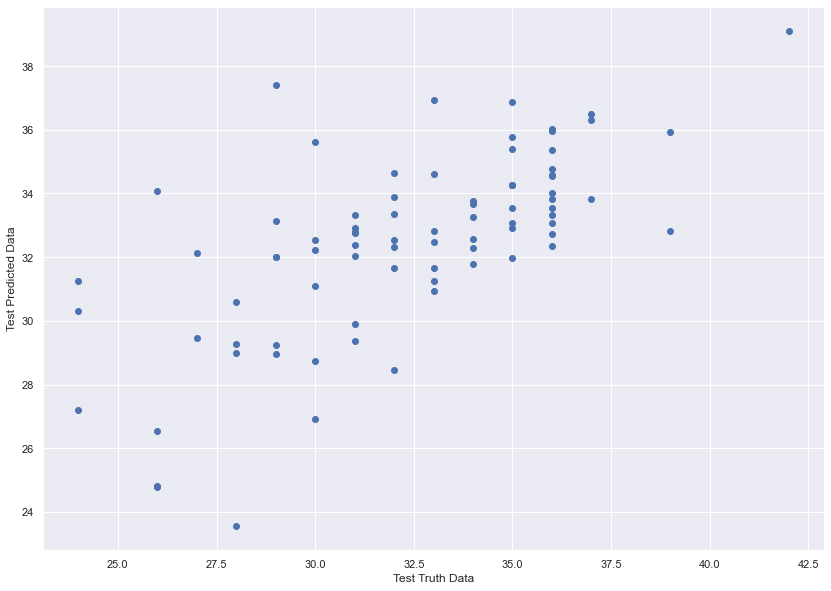

In [205]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

We can see that the relationship between actual and predicted values is linear.

In [206]:
#Calculating residual
residuals = y_test - reg_pred
residuals

46    -2.994935
228   -4.126640
183    2.673708
116    1.216143
126   -0.246099
         ...   
129   -0.407145
244   -7.253617
210   -3.936925
102    3.092150
78     2.449601
Name: Temperature, Length: 81, dtype: float64

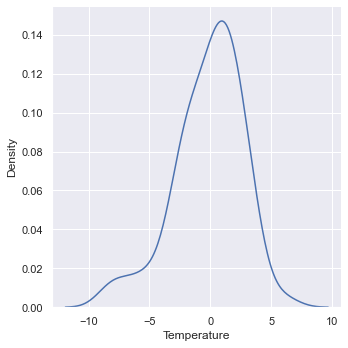

In [207]:
# distribution of residual are approxi normal fashion 
sns.displot(residuals,kind='kde')    #little sked due to outliers

we can see that the distribution of data is little leftskewd data distribued. We can overcome this by hyperparameter tunning.



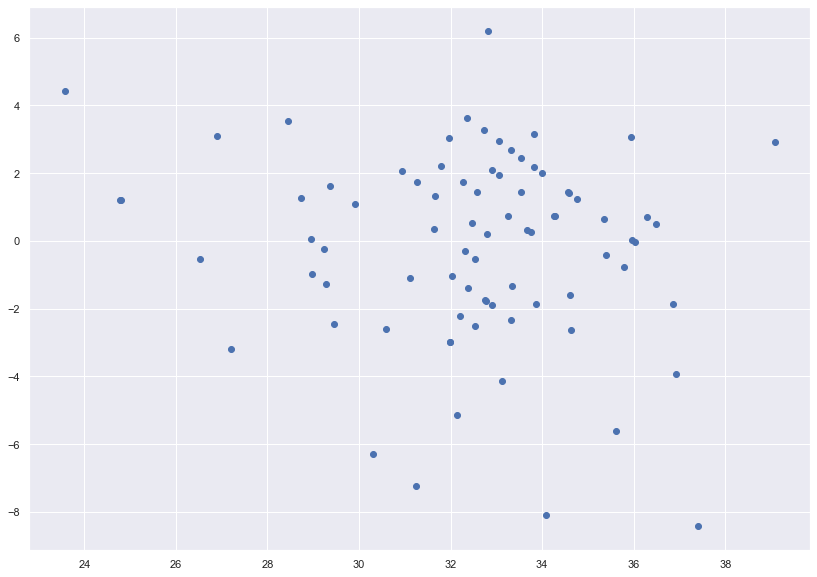

In [208]:
# The distribution should be uniform (Homoscedasticity)
plt.scatter(reg_pred, residuals)

**Performance Metrics**



In [211]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.792858437296982
2.1532259595595913
2.791569171146755


In [212]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.4370546969181549


In [214]:
## Adjusted R2 need to write
# need to perform
adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
print(adjR)

0.4050971032934213


# Ridge Regression

**Ridge Regression (also called as L2 Regularization),the main aim of ridge regression is to reduce overfitting**

In [217]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1)

In [218]:
ridge=Ridge()


In [222]:
ridge.fit(X_train,y_train)


Ridge()

In [223]:
print(ridge.coef_)


[-0.35498915 -0.22833494 -1.48029097 -0.70374866 -0.24661714  0.85405124
  0.08174868  0.64566072  0.07203342  0.17636996 -0.314502    0.17870778
  0.22535392]


In [224]:
print(ridge.intercept_)


32.074074074074076


In [226]:
ridge_pred=ridge.predict(X_test)


In [227]:
ridge_pred

array([31.99412337, 33.12040196, 33.34904202, 24.81531826, 29.25317586,
       33.68676155, 31.63059048, 34.61400469, 31.81080916, 32.30710445,
       33.54409223, 33.34199846, 35.75695644, 32.03039126, 34.196428  ,
       33.27080718, 26.56260115, 35.93359951, 33.31573076, 23.60085512,
       32.31428709, 32.51199227, 33.06509029, 32.82454574, 29.89856284,
       32.75584864, 32.90298721, 32.1343128 , 31.97312855, 34.06519694,
       34.59717106, 33.86491378, 34.5259007 , 32.78015204, 31.23264081,
       28.7431667 , 32.55777417, 31.67069931, 33.05264996, 33.9776409 ,
       33.85967669, 35.60302534, 34.26796346, 37.35281757, 32.90360982,
       36.53560291, 32.26187897, 35.34292679, 30.59554534, 31.10728523,
       32.39611356, 39.09427765, 32.7429986 , 34.63335351, 27.23033441,
       36.89104824, 33.84982341, 33.71470698, 29.01228005, 32.45261276,
       32.52613462, 31.98628733, 24.81143025, 36.32031857, 36.06254441,
       28.98050626, 29.42546164, 29.37614081, 35.99109657, 28.46

**ASSUMPTIONS OF LINEAR REGRESSION**

Text(0, 0.5, 'Test Predicted Data')

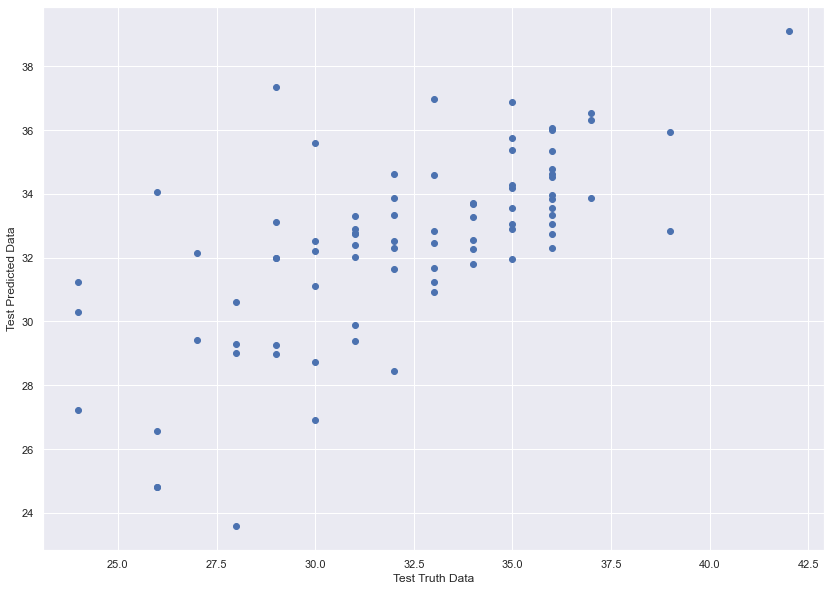

In [228]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [229]:
residuals=y_test-ridge_pred


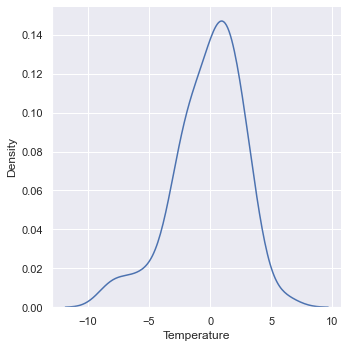

In [230]:
sns.displot(residuals,kind="kde")


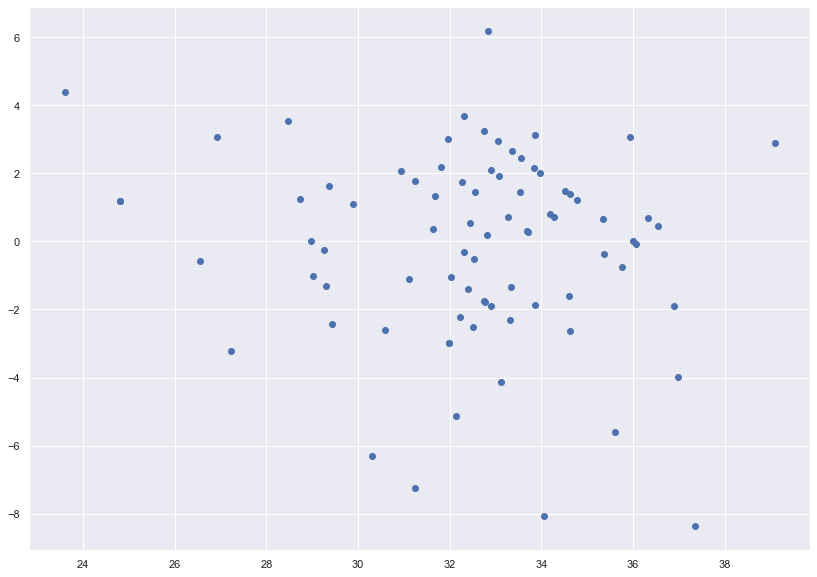

In [232]:
# The distribution should be uniform (Homoscedasticity)
plt.scatter(ridge_pred,residuals)

**Performance Metrics**

In [233]:
print(mean_squared_error(y_test,ridge_pred))
print(mean_absolute_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

7.770134748047861
2.151505587243574
2.78749614314493


**R SQUARE & ADJUSTED R SQUARE**

In [234]:
score=r2_score(y_test,reg_pred)
score

0.4370546969181549

In [237]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-_test.shape[1]-1)

0.3278265037828716

# Lasso Regression

LASSO Regression(also called as L1 Norm/L1 Regularization),the main aim of LASSO regressio is to reduce the features which are least correlated with dependent variables .

If our datasets has outliers we should use LASSO .

In [239]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)

In [240]:
lasso=Lasso()
lasso

Lasso()

SyntaxError: invalid syntax (Temp/ipykernel_19588/3950055801.py, line 1)

In [245]:
lasso.fit(X_train,y_train)

Lasso()

In [246]:
print(lasso.coef_)


[ 0.         -0.         -0.88423537 -0.         -0.          0.88313134
  0.          0.          0.          0.          0.          0.
  0.        ]


In [247]:
print(lasso.intercept_)


32.074074074074076


In [249]:
lasso_pred=lasso.predict(X_test)


In [250]:
lasso_pred

array([31.99263189, 33.56261409, 33.16968133, 29.35085197, 29.41532603,
       33.00570181, 32.24618859, 33.57987995, 32.17946599, 33.03180429,
       32.43352237, 32.64830012, 34.42463082, 31.61671515, 32.83763259,
       33.35142638, 29.33942467, 34.79854886, 32.38506498, 29.63719153,
       32.36854863, 32.21265622, 32.60134175, 31.81897394, 31.16330572,
       32.75364414, 32.88409128, 32.36320974, 32.04108928, 31.96868565,
       33.24608236, 33.07067555, 33.54659742, 32.57214892, 31.41161583,
       30.06340682, 32.79726231, 32.13550568, 33.36310351, 33.22497663,
       33.25167109, 34.07840658, 33.22831682, 33.75728546, 32.90619636,
       34.59903828, 32.34644356, 33.72050521, 31.73648451, 31.41845375,
       32.26170559, 35.46055533, 32.15686124, 33.60932262, 29.07618954,
       34.41195434, 33.23999395, 32.50358516, 29.88575148, 32.20406944,
       32.0385909 , 31.44605525, 29.20463799, 34.49394409, 33.4095622 ,
       30.24824223, 31.37474327, 30.84852284, 34.06622977, 30.49

**ASSUMPTIONS OF LINEAR REGRESSION**

Text(0, 0.5, 'Test Predicted Data')

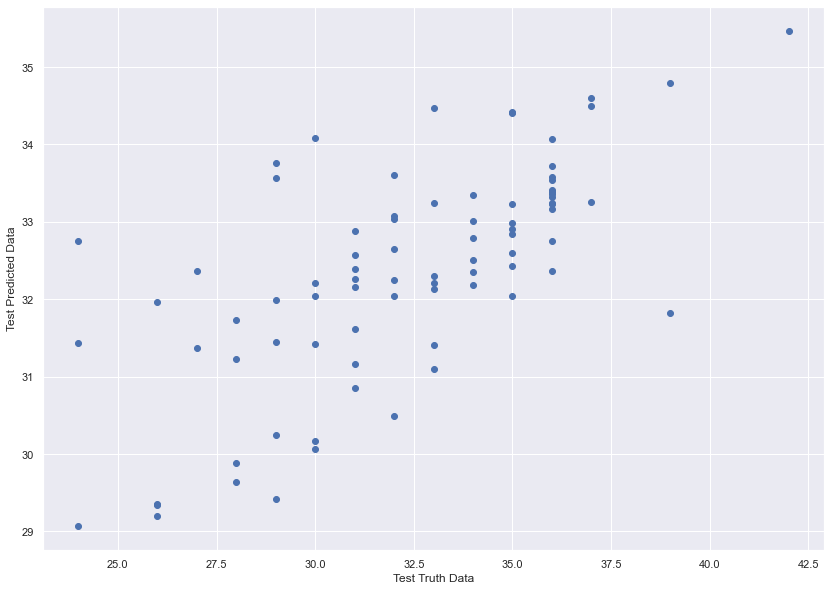

In [251]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [252]:
residuals=y_test-lasso_pred


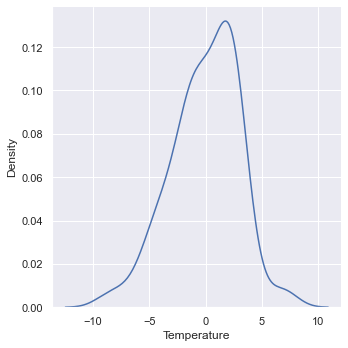

In [253]:
sns.displot(residuals,kind="kde")


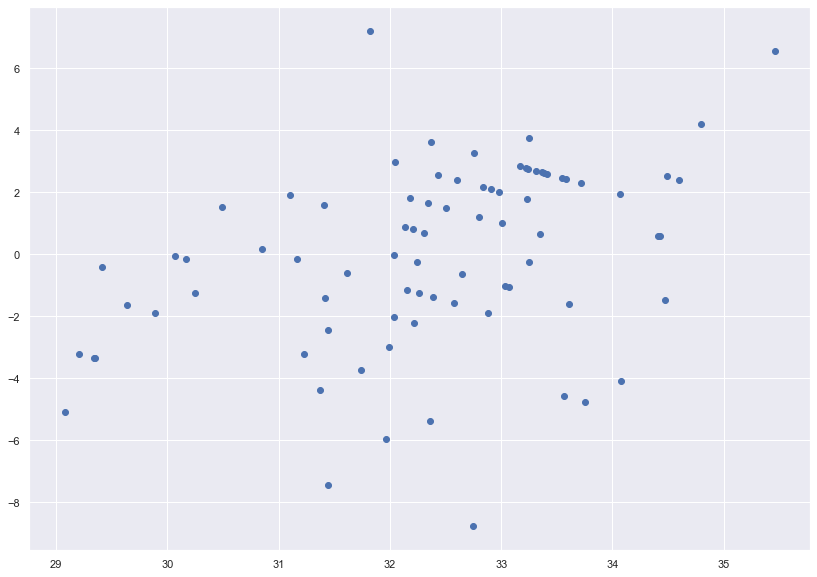

In [255]:
plt.scatter(lasso_pred,residuals)


**Performance Metrics**

In [256]:
print(mean_squared_error(y_test,lasso_pred))
print(mean_absolute_error(y_test,lasso_pred))
print(np.sqrt(mean_squared_error(y_test,lasso_pred)))

8.69462464944341
2.370968686727018
2.9486648927003234


**R SQUARE & ADJUSTED R SQUARE**

In [257]:
score=r2_score(y_test,lasso_pred)
score

0.3719123543887275

In [259]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.250044602255197

# ElasticNet

**ElasticNet is a combination of Ridge & LAASO Regression**

In [261]:
from sklearn.linear_model import ElasticNet
el_reg = ElasticNet(random_state=0)

In [262]:
elastic_net=ElasticNet()


In [263]:
elastic_net.fit(X_train,y_train)


ElasticNet()

In [264]:
print(elastic_net.coef_)


[ 0.         -0.         -0.7730265  -0.26945253 -0.02396636  0.67644044
  0.10592038  0.          0.18367796  0.03890539  0.10736141  0.12263291
  0.        ]


In [265]:
print(elastic_net.intercept_)


32.074074074074076


In [266]:
elastic_net_pred=elastic_net.predict(X_test)


In [267]:
elastic_net_pred

array([32.07409039, 33.29293313, 33.39263218, 28.69961366, 29.49374905,
       33.25881227, 31.64944534, 33.96769667, 32.19566374, 32.6253187 ,
       32.53967421, 32.79104134, 34.34008686, 32.04655715, 32.69212517,
       33.40819207, 29.24666067, 35.09553512, 32.51236162, 28.84719082,
       32.04686673, 31.94146   , 32.90451267, 32.09994982, 30.69117185,
       32.84175353, 32.80749928, 31.70511919, 31.74844972, 32.57412681,
       33.4332043 , 33.07529204, 33.29587412, 32.70094519, 31.5247729 ,
       29.86224568, 32.20245403, 31.65054472, 33.31130095, 32.77809367,
       33.63822223, 34.12018474, 33.53213032, 34.40329859, 32.8685631 ,
       35.48710781, 31.90216194, 34.21871278, 30.97975835, 31.50089875,
       32.42299224, 36.61434905, 32.15427936, 33.96759058, 29.12343931,
       35.27201784, 33.49130546, 32.46770779, 29.82387004, 32.19644604,
       32.44217857, 31.33525761, 28.36842114, 35.09711535, 34.56195088,
       30.26102351, 30.51552991, 30.38246618, 34.74948956, 29.81

**ASSUMPTIONS OF LINEAR REGRESSION**

Text(0, 0.5, 'Test Predicted Data')

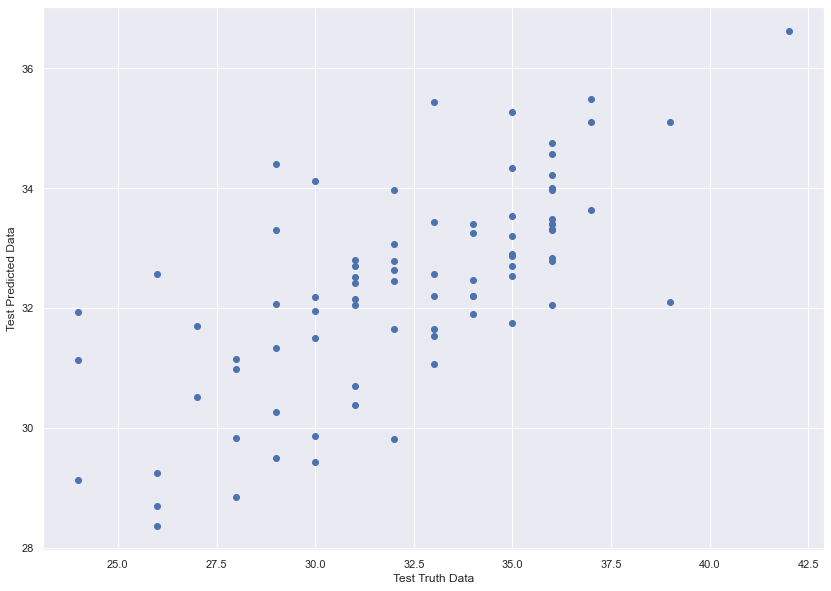

In [268]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,elastic_net_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [269]:
residuals=y_test-elastic_net_pred


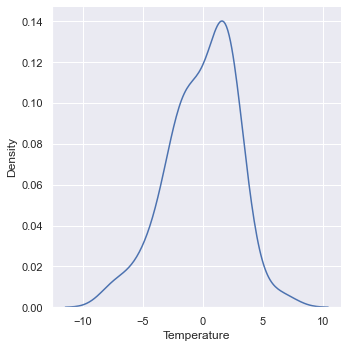

In [270]:
sns.displot(residuals,kind="kde")


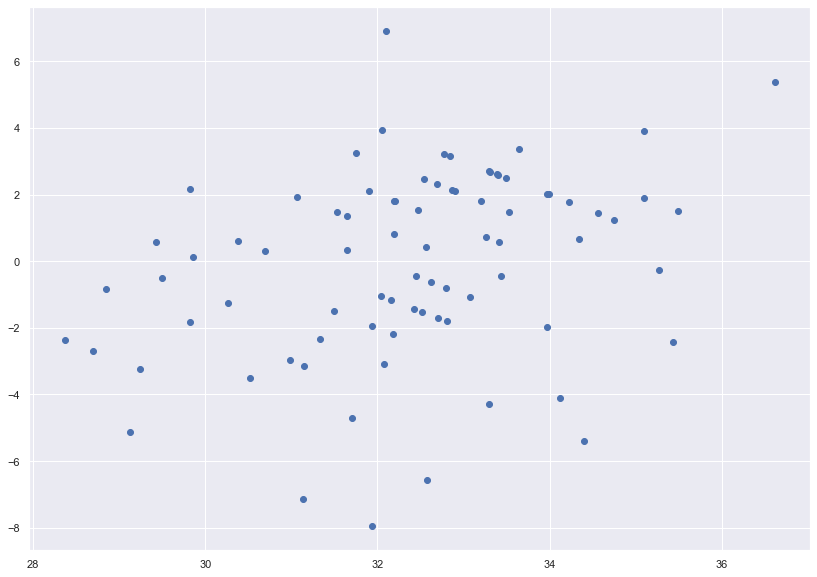

In [271]:
plt.scatter(elastic_net_pred,residuals)


**Performance Metrics**

In [272]:
print(mean_squared_error(y_test,elastic_net_pred))
print(mean_absolute_error(y_test,elastic_net_pred))
print(np.sqrt(mean_squared_error(y_test,elastic_net_pred)))

7.915513754032116
2.286670095063569
2.8134522839444274


**R SQUARE & ADJUSTED R SQUARE**

In [273]:
score=r2_score(y_test,elastic_net_pred)
score

0.4281942466726337

In [275]:
## Adjusted R square
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3172468616986671